# Results of experiments with transformer models on SCAN dataset

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

Load all data into numpy array

In [3]:
def load_runs(results_path,n_runs):
    losses = []
    train_accs = []
    dev_accs = []
    test_accs = []
    for run in range(n_runs):
        fn = results_path + str(run) + '.json'
        with open(fn,'r') as f:
            results = json.load(f)
        losses.append(results['loss_data'])
        train_accs.append(results['train_accs'])
        dev_accs.append(results['dev_accs'])
        test_accs.append(results['test_accs'])
    losses = np.array(losses)
    train_accs = np.array(train_accs)
    dev_accs = np.array(dev_accs)
    test_accs = np.array(test_accs)
    return losses, train_accs, dev_accs, test_accs

In [4]:
n_runs = 10

In [6]:
results_path = '../results/transformer/train_defaults_simple'
simple_losses, simple_train, simple_dev, simple_test = load_runs(results_path,n_runs)

In [8]:
results_path = '../results/transformer/train_defaults_jump'
jump_losses, jump_train, jump_dev, jump_test = load_runs(results_path,n_runs)

Plot losses

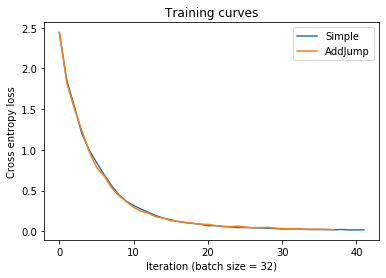

In [9]:
simple_losses_ave = np.mean(simple_losses,axis=0)
jump_losses_ave = np.mean(jump_losses,axis=0)
plt.plot(simple_losses_ave)
plt.plot(jump_losses_ave)
plt.xlabel('Iteration (batch size = 32)')
plt.ylabel('Cross entropy loss')
plt.title('Training curves')
plt.legend(['Simple','AddJump'])
plt.show()

Plot test accuracy

In [11]:
simple_train_ave = np.mean([np.max(simple_train[i,:]) for i in range(n_runs)])
jump_train_ave = np.mean([np.max(jump_train[i,:]) for i in range(n_runs)])
simple_dev_ave = np.mean([np.max(simple_dev[i,:]) for i in range(n_runs)])
jump_dev_ave = np.mean([np.max(jump_dev[i,:]) for i in range(n_runs)])
simple_test_ave = np.mean([np.max(simple_test[i,:]) for i in range(n_runs)])
jump_test_ave = np.mean([np.max(jump_test[i,:]) for i in range(n_runs)])

In [15]:
simple_train_std = np.std([np.max(simple_train[i,:]) for i in range(n_runs)])
jump_train_std = np.std([np.max(jump_train[i,:]) for i in range(n_runs)])
simple_dev_std = np.std([np.max(simple_dev[i,:]) for i in range(n_runs)])
jump_dev_std = np.std([np.max(jump_dev[i,:]) for i in range(n_runs)])
simple_test_std = np.std([np.max(simple_test[i,:]) for i in range(n_runs)])
jump_test_std = np.std([np.max(jump_test[i,:]) for i in range(n_runs)])
train_std = [simple_train_std, jump_train_std]
dev_std = [simple_dev_std, jump_dev_std]
test_std = [simple_test_std, jump_test_std]

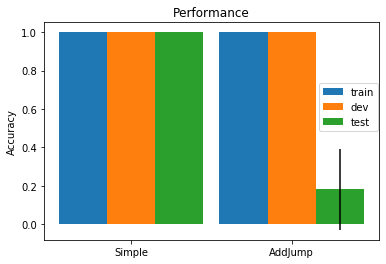

In [16]:
c = np.array([0,1])
w = 0.3

plt.bar(c-w,[simple_train_ave,jump_train_ave],yerr=train_std,width=w)
plt.bar(c,[simple_dev_ave,jump_dev_ave],yerr=dev_std,width=w)
plt.bar(c+w,[simple_test_ave,jump_test_ave],yerr=test_std,width=w)
plt.xticks(c,['Simple','AddJump'])
plt.ylabel('Accuracy')
plt.title('Performance')
plt.legend(['train','dev','test'],loc=[0.82,0.5])
plt.show()

In [25]:
print(simple_train_ave, simple_train_std)

1.0 0.0


In [26]:
print(simple_dev_ave, simple_dev_std)

0.9999701046337817 8.968609865470655e-05


In [28]:
print(simple_test_ave, simple_test_std)

0.9999760879961741 7.17360114777632e-05


In [29]:
print(jump_train_ave, jump_train_std)

1.0 0.0


In [30]:
print(jump_dev_ave, jump_dev_std)

1.0 0.0


In [31]:
print(jump_test_ave, jump_test_std)

0.18120944718401244 0.2112169570818004


In [33]:
np.max([np.max(jump_test[i,:]) for i in range(n_runs)])

0.6667531793407734